# 02 Toy Example

In [1]:
from staNMF import staNMF
from staNMF.nmf_models import spams_nmf, sklearn_nmf, torch_nmf
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from staNMF.main import amariMaxError, findcorrelation

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.nmf module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load data
n_features = 10
n_samples = 200
n_components = 5
V = (
    np.random.uniform(0, 1, (n_components, n_features))
    * np.random.choice([0, 1], (n_components, n_features))
)
U = (
    np.random.uniform(0, 1, (n_samples, n_components))
    * np.random.choice([0, 1], (n_samples, n_components), p=[0.8,0.2])
)
X = U @ V + np.random.normal(0,1,(n_samples, n_features)) * 0.1

In [17]:
# define_model
model = staNMF(np.maximum(X,0),folderID="toy_example", K1=3, K2=7, parallel=False, replicates=50, seed=123)

In [18]:
a = torch_nmf(
    n_features=10,
    n_components=1,
    cpu_workers=4,
    n_neurons1=500,
    max_epochs=50,
    bootstrap=True,
    batch_size=50,
    learning_rate=0.001,
    record=True,
)

In [19]:
# run NMF for different Ks
model.runNMF(a)#sklearn_nmf(bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [20]:
# compute the instability
model.instability("torch_nmf")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


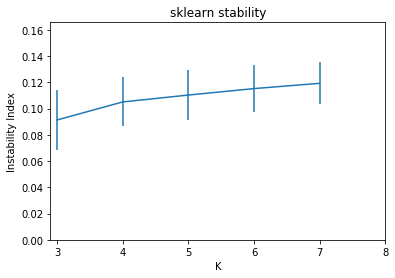

In [21]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [22]:
a.obj_list_

[0.10784250497817993,
 0.09557542204856873,
 0.07481498271226883,
 0.052210502326488495,
 0.037299010902643204,
 0.030457446351647377,
 0.02765289507806301,
 0.026788000017404556,
 0.026462405920028687,
 0.026343440636992455,
 0.026268642395734787,
 0.026203138753771782,
 0.026146631687879562,
 0.026095714420080185,
 0.026028895750641823,
 0.02595977857708931,
 0.025872139260172844,
 0.02576170675456524,
 0.02562321536242962,
 0.02546590194106102,
 0.0252216923981905,
 0.02490328997373581,
 0.024540584534406662,
 0.024019038304686546,
 0.02334454655647278,
 0.02246086485683918,
 0.02134309522807598,
 0.020221279934048653,
 0.01894945651292801,
 0.017673559486865997,
 0.01659807190299034,
 0.015848008915781975,
 0.015154034830629826,
 0.014564118348062038,
 0.014105698093771935,
 0.01365998387336731,
 0.013229449279606342,
 0.012751816771924496,
 0.012426447123289108,
 0.011877376586198807,
 0.011531687341630459,
 0.011167583055794239,
 0.0108356773853302,
 0.010483085177838802,
 0.0102

In [23]:
model.get_instability()

{3: 0.09128013682580145,
 4: 0.1050211088955299,
 5: 0.1102674908065887,
 6: 0.11518736225420861,
 7: 0.11920135163657346}

- Observation: the staNMF chooses the right number of components.

In [26]:
model = load("./staNMFDicts_toy_example/K=7/nmf_model_torch_nmf_0.joblib")

In [34]:
from sklearn.preprocessing import normalize

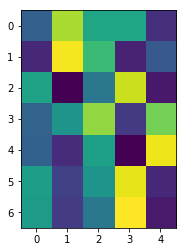

In [35]:
norm_V = normalize(V)# / np.sum(V ** 2, 1) ** .5
plt.imshow(model.components_ @ norm_V.T)

## Try sklearn nmf

In [37]:
# define_model
model = staNMF(np.maximum(X,0),
               folderID="toy_example",
               K1=3, K2=7,
               parallel=True,
               replicates=50,
               seed=123)

In [ ]:
# run NMF for different Ks
model.runNMF(sklearn_nmf(bootstrap=True))

Working on K = 3...


In [ ]:
# compute the instability
model.instability("sklearn_nmf")

In [ ]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [ ]:
model.get_instability()

- Observation: the stability for patterns 3-5 is very good. For more patterns, it is less good.

In [25]:
model1 = load("./staNMFDicts_toy_example/K=3/nmf_model_sklearn_nmf_17.joblib")
model2 = load("./staNMFDicts_toy_example/K=3/nmf_model_sklearn_nmf_10.joblib")

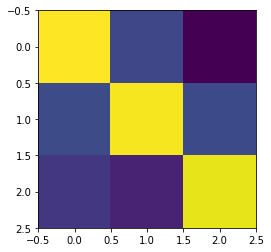

In [26]:
plt.imshow(findcorrelation(model1.components_.T, model2.components_.T))